In [1]:
# !pip install numpy
# !pip install tensorflow


In [2]:
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from sklearn.metrics import precision_score,recall_score, accuracy_score,confusion_matrix,f1_score
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import History

import pandas as pd



c:\Users\riash\anaconda3\envs\tf_old\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\riash\anaconda3\envs\tf_old\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\riash\anaconda3\envs\tf_old\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\riash\anaconda3\envs\tf_old\lib\site-packages\tensorflow\pyth

In [3]:
### Train/Test Data seperation

file_out = pd.read_csv('Data/adult_processed.csv')
cols = []
for i in list(file_out.columns):
    if  i != 'income':
        cols.append(i)

feature_set1 = pd.read_csv('Data/train.csv')
feature_set2 = pd.read_csv('Data/test.csv')

print(feature_set1['fnlwgt'])
x = feature_set1[cols].copy().values
y = feature_set1[['income']].copy().values
        
sc = StandardScaler()
X_train = sc.fit_transform(x)
y_train = y

x2 = feature_set2[cols].copy().values
y2 = feature_set2[['income']].copy().values
        
X_test = sc.transform(x2)
y_test = y2


X_test.shape, y_test.shape 

0        178960
1        158672
2         25051
3        231196
4        187052
          ...  
39068    190682
39069    177825
39070    192323
39071    156736
39072    164102
Name: fnlwgt, Length: 39073, dtype: int64


((9768, 94), (9768, 1))

In [4]:

# Train/Test data based on  gender: 4 sets

# train

female_features =  feature_set1[feature_set1['gender_Female']==1]
x_female = female_features[cols].copy().values
y_female = female_features[['income']].copy().values

X_train_female = sc.fit_transform(x_female)
y_train_female = y_female

male_features = feature_set1[feature_set1['gender_Male']==1] 
x_male = male_features[cols].copy().values
y_male = male_features[['income']].copy().values

X_train_male = sc.fit_transform(x_male)
y_train_male = y_male



# checks
X_train.shape, X_train_female.shape, X_train_male.shape


((39073, 94), (12919, 94), (26154, 94))

In [5]:
# print(female_features['fnlwgt'])
fnlwgt_female = female_features['fnlwgt'].copy().values
print(fnlwgt_female)

fnlwgt_male = male_features['fnlwgt'].copy().values
print(fnlwgt_male)

[178960 187052 227858 ... 190682 156736 164102]
[158672  25051 231196 ... 149531 177825 192323]


In [6]:
# !pip install seaborn

In [7]:
# !pip install plotly

In [8]:
import plotly.express as px
df = fnlwgt_female
fig = px.ecdf(df, x="total_bill")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0] but received: total_bill

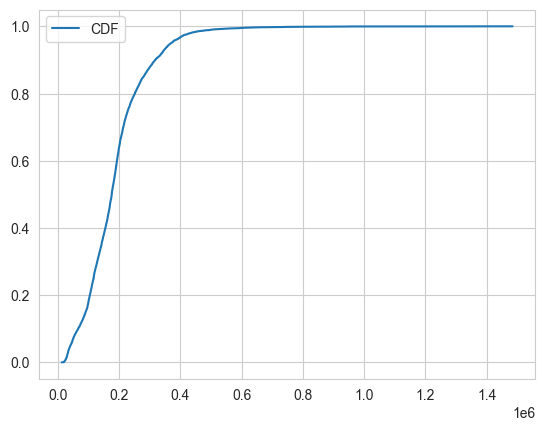

In [18]:

count, bins_count = np.histogram(fnlwgt_female, bins=1000000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()



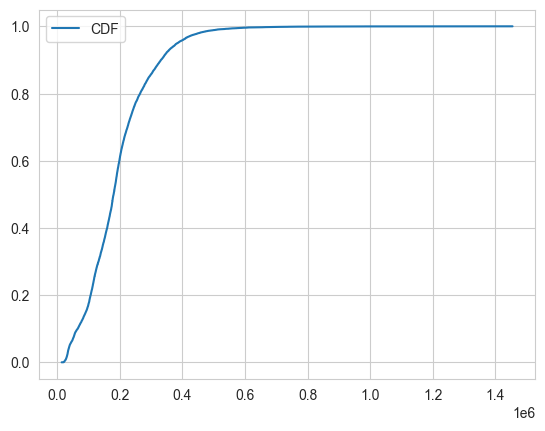

In [17]:
count, bins_count = np.histogram(fnlwgt_male, bins=1000000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

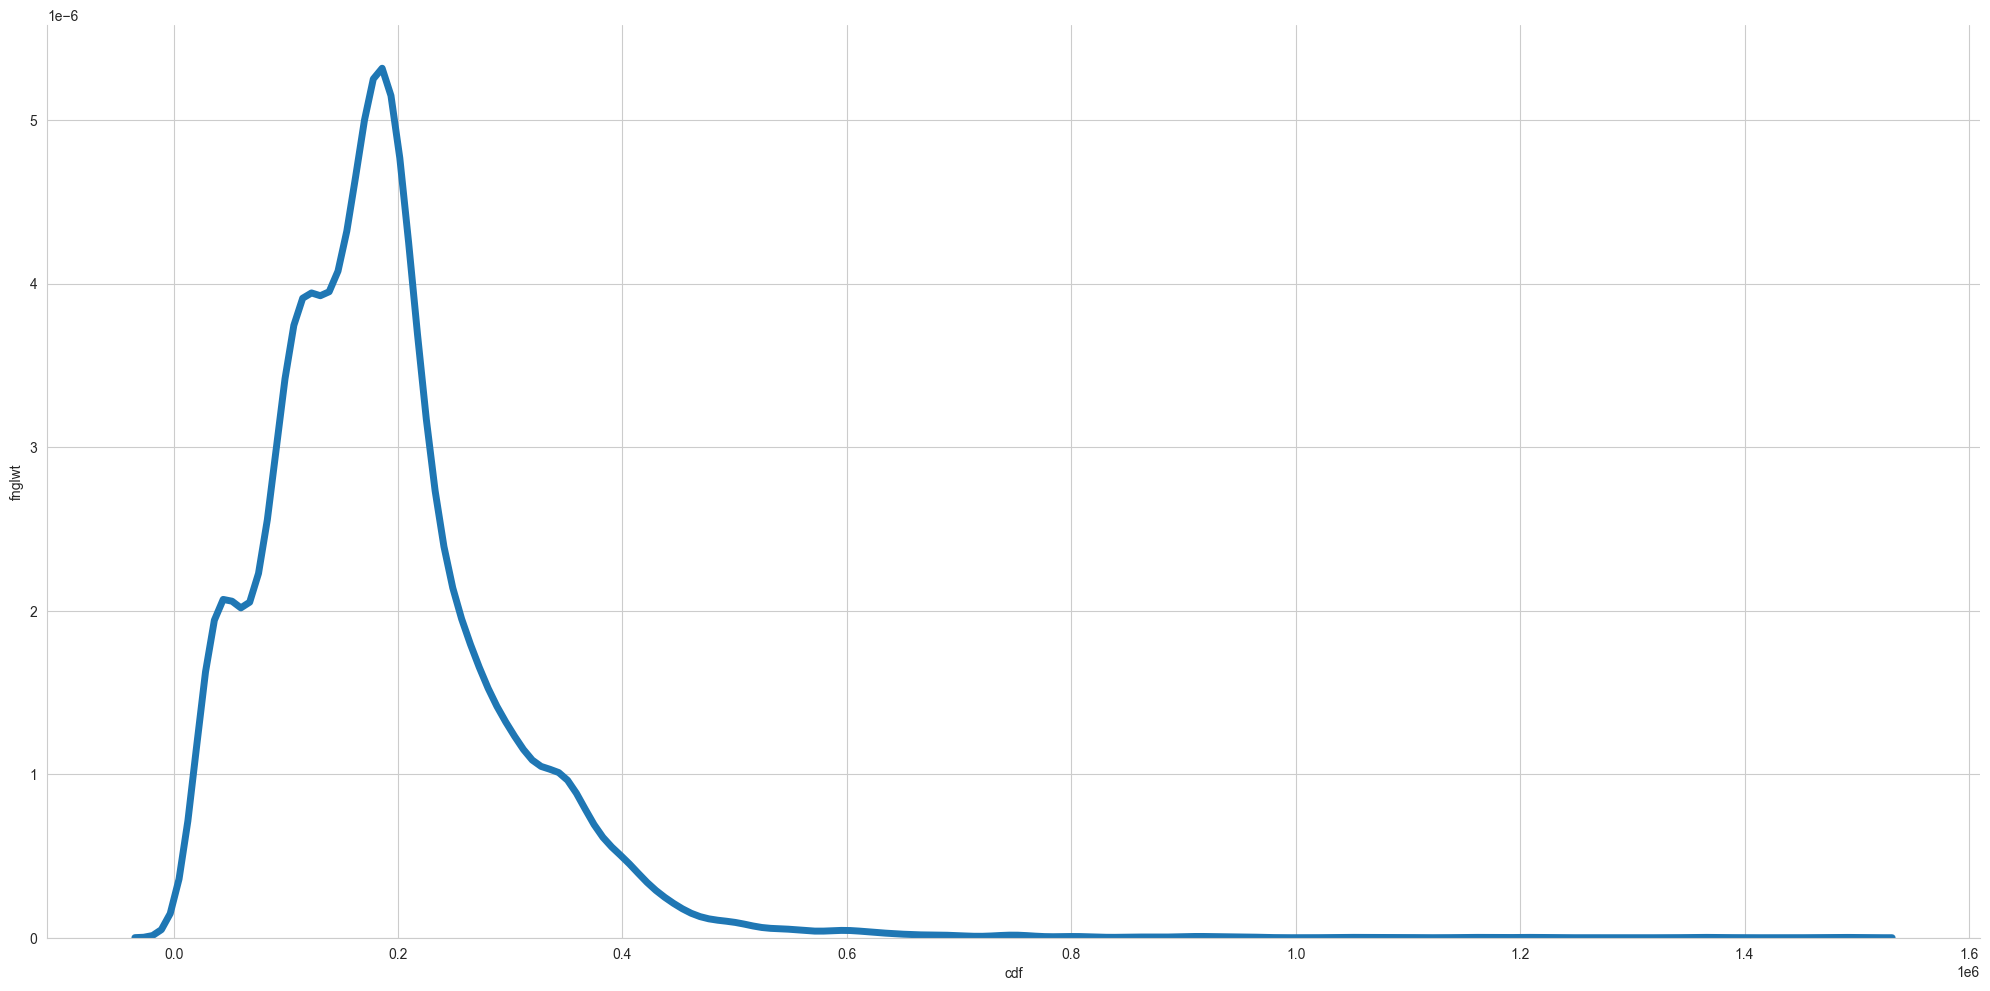

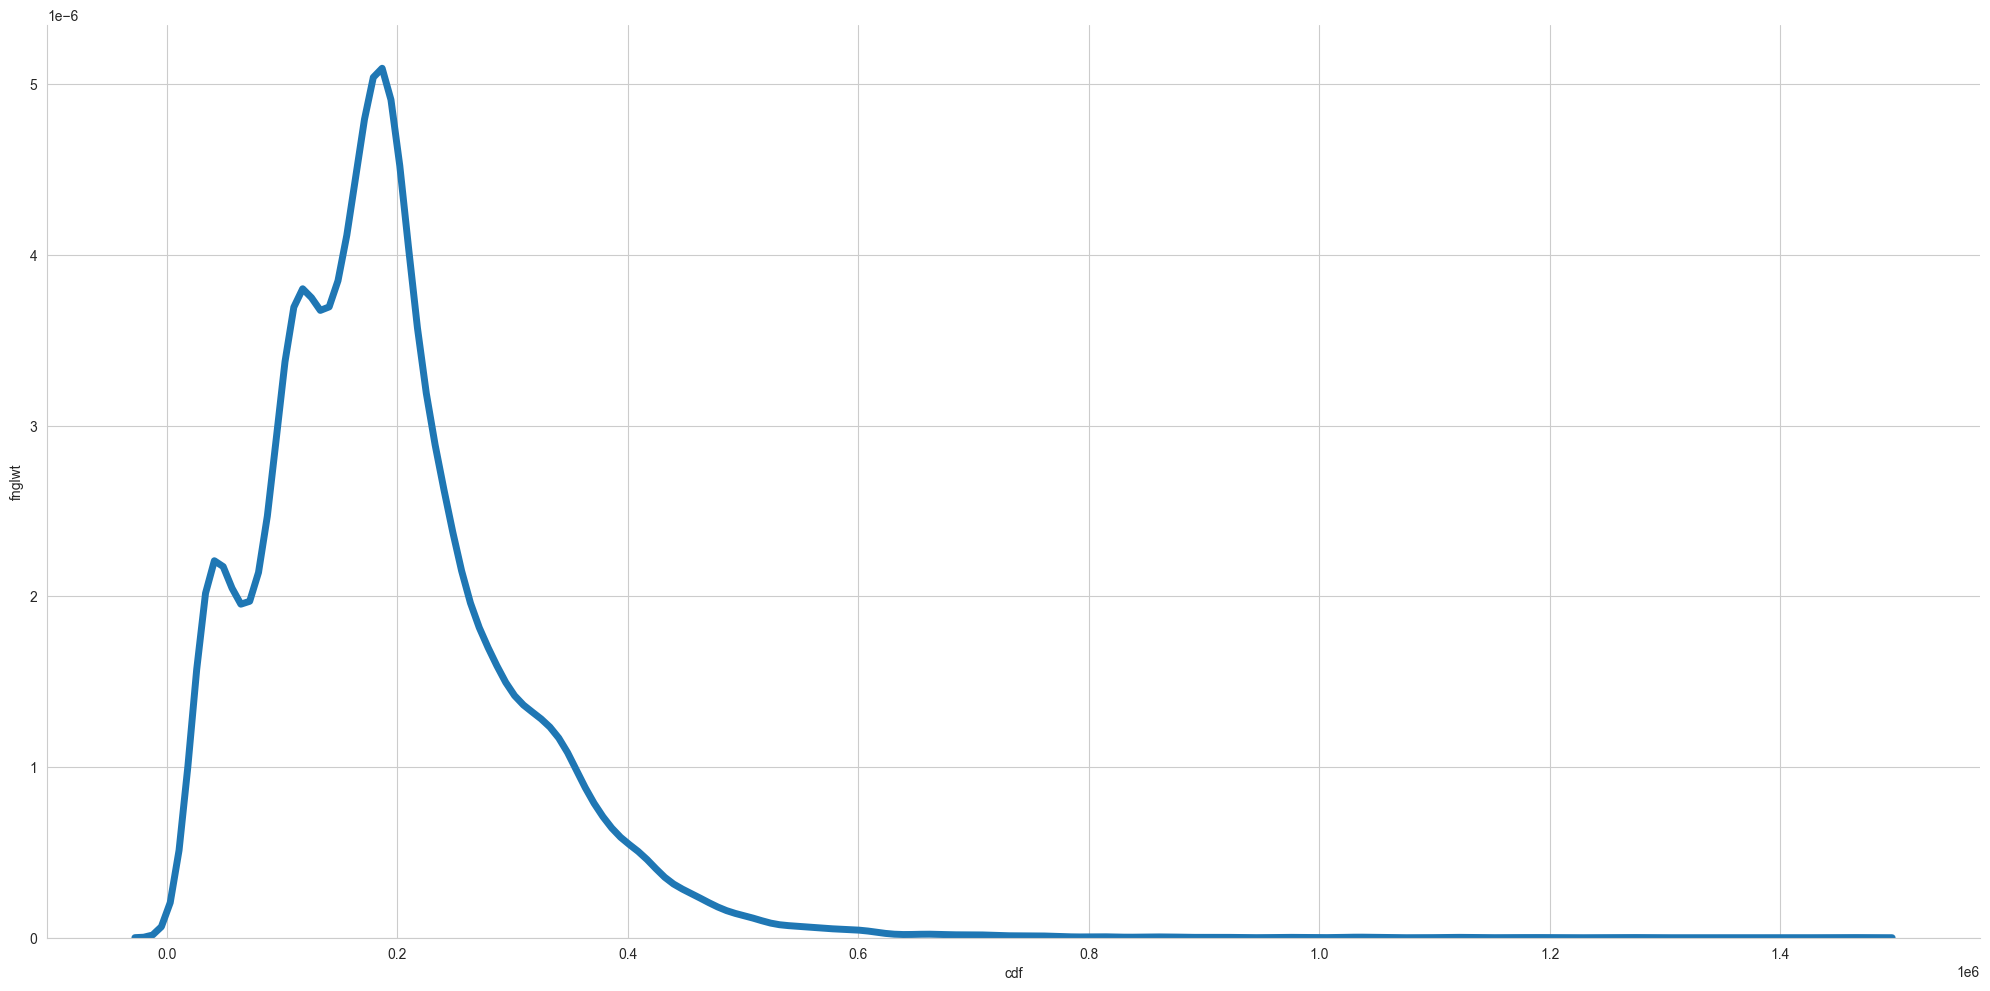

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

fnlwgts = [fnlwgt_female, fnlwgt_male]

for i in fnlwgts:
    #  gamma
    shape, loc, scale = stats.gamma.fit(i)
    cdf = stats.gamma.cdf(i, shape, loc=loc, scale=scale)

    # mean, std = stats.norm.fit(i)
    # cdf =  stats.norm.cdf(i, mean, std)

    # beta_params = stats.beta.fit(i)
    # cdf = stats.beta.cdf(i, beta_params[0], beta_params[1], beta_params[2], beta_params[3])

    # pdfs.append(pdf)
    sns.set_style("whitegrid")

    ax = sns.displot( x = i, kind = "kde", height=10, aspect=2,
                linewidth = 5 )
    plt.ylabel("fnglwt")
    #     plt.xlabel("Loss")
    plt.xlabel("cdf")

    plt.show()

# for i in list(client_accuracy.keys()):
#     print("client_",i, " loss: ", client_loss[i],"freq: ", client_frequency[i], "acc", client_accuracy[i])
    
#     norm
    # mean, std = stats.norm.fit(client_loss[i])
    # pdf =  stats.norm.pdf(client_loss[i], mean, std)

#     df_mean = np.mean(client_frequency[i])
#     df_std = np.std(client_frequency[i])
#     pdf = stats.norm.pdf(client_frequency[i], df_mean, df_std)
    
#     lognorm
#     shape, loc, scale = stats.lognorm.fit(client_loss[i])
#     pdf = stats.lognorm.pdf(client_loss[i], shape, loc, scale)

#     beta
#     beta_params = stats.beta.fit(client_loss[i])
#     pdf = stats.beta.pdf(client_loss[i], beta_params[0], beta_params[1], beta_params[2], beta_params[3])

#     burr
#     burr_params = stats.burr.fit(client_loss[i])
#     pdf = stats.burr.pdf(client_loss[i], burr_params[0], burr_params[1], burr_params[2], burr_params[3])

    


Text(0.5, 0, 'fnglwt')

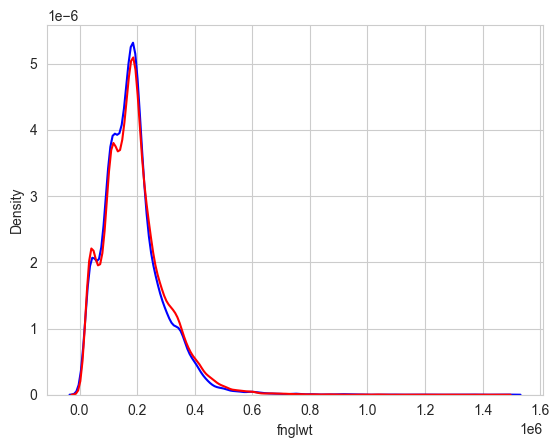

In [63]:


sns.kdeplot(fnlwgt_female,  color = "blue",label = "female")
sns.kdeplot(fnlwgt_male, color = "red",label = "male")
# plt.xticks([0, 200000,400000,800000,1000000,1200000, 1400000, 1600000])
plt.xlabel('fnglwt')


Text(0.5, 0, 'fnglwt')

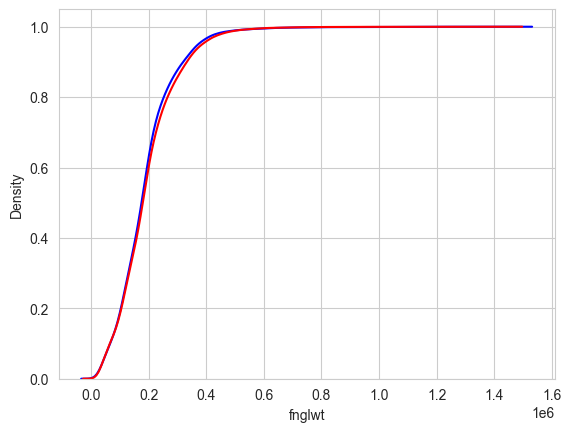

In [64]:
sns.kdeplot(fnlwgt_female, cumulative = True, color = "blue",label = "female")
sns.kdeplot(fnlwgt_male, cumulative = True,color = "red",label = "male")
# plt.xticks([0, 200000,400000,800000,1000000,1200000, 1400000, 1600000])
plt.xlabel('fnglwt')

Text(0.5, 0, 'fnglwt')

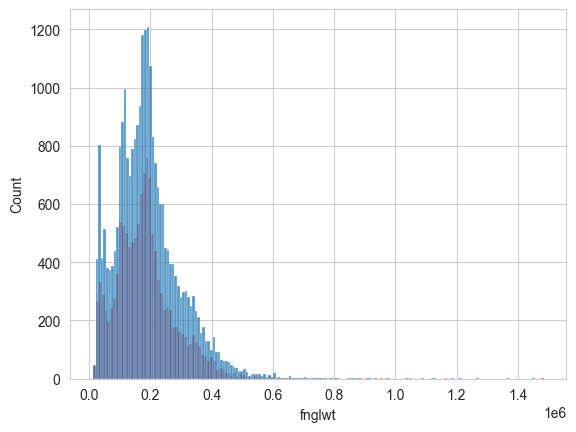

In [61]:
sns.histplot(fnlwgt_female,color="red",  label = "female")
sns.histplot(fnlwgt_male,  label = "male")
plt.xlabel('fnglwt')


Text(0.5, 0, 'fnglwt')

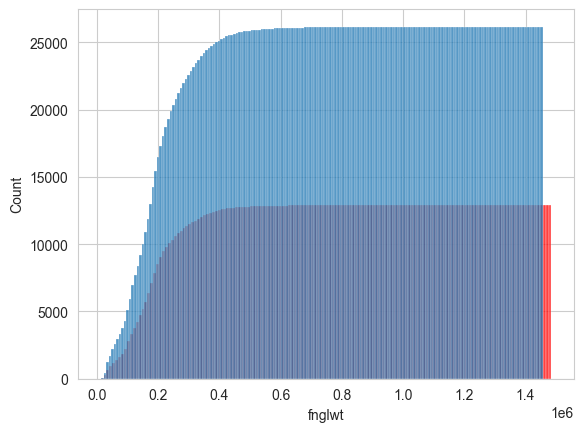

In [62]:
sns.histplot(fnlwgt_female,cumulative = True,color="red",  label = "female")
sns.histplot(fnlwgt_male,  cumulative = True, label = "male")
plt.xlabel('fnglwt')

[178960 187052 227858 ... 190682 156736 164102]
[158672  25051 231196 ... 149531 177825 192323]


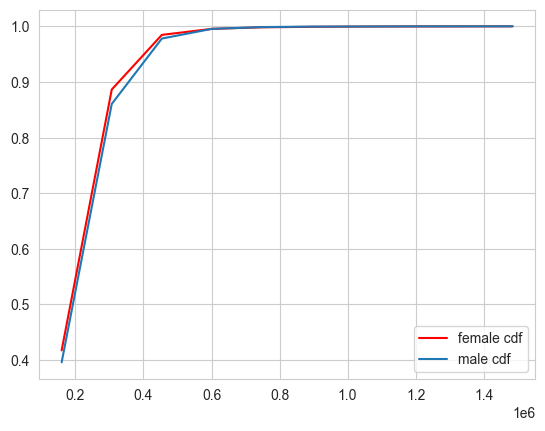

In [32]:
print(fnlwgts [0])
print(fnlwgts [1])

count, bins_count = np.histogram(fnlwgts [0], bins=10) 
count2, bins_count2 = np.histogram(fnlwgts [1], bins=10) 

  
# finding the PDF of the histogram using count values 
pdf = count / sum(count) 
pdf2 = count2 / sum(count2) 

  
# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
cdf = np.cumsum(pdf) 
cdf2 = np.cumsum(pdf2) 

# figure, axis = plt.subplots(1, 2) 
  
# axis[0].plot(bins_count[1:], cdf, label="CDF") 
# axis[0].set_title("female") 
# axis[ 1].plot(bins_count[1:], cdf2, label="CDF")
# axis[ 1].set_title("male") 
# plt.show()
  
# plotting PDF and CDF 
plt.plot(bins_count[1:], cdf, color="red", label="female cdf") 
plt.plot(bins_count[1:], cdf2, label="male cdf") 
plt.legend()

In [22]:
fq1 = np.quantile(fnlwgt_female, .25)
mq1 = np.quantile(fnlwgt_male, .25)
fq2 = np.quantile(fnlwgt_female, .50)
mq2 = np.quantile(fnlwgt_male, .50)
fq3 = np.quantile(fnlwgt_female, .75)
mq3 = np.quantile(fnlwgt_male, .75)
fq4 = np.quantile(fnlwgt_female, 1)
mq4 = np.quantile(fnlwgt_male, 1)

print(fq1, mq1)
print(fq2, mq2)
print(fq3, mq3)
print(fq4, mq4)

q1 = (fq1 + mq1)/2
q2 = (fq2 + mq2)/2
q3 = (fq3 + mq3)/2
q4 = (fq4 + mq4)/2

quantiles = [q1, q2, q3, q4]
print(quantiles)


116554.0 117779.0
175878.0 179951.0
228779.0 241350.0
1484705 1455435
[117166.5, 177914.5, 235064.5, 1470070.0]


[ 117166.5  177914.5  235064.5 1470070. ]


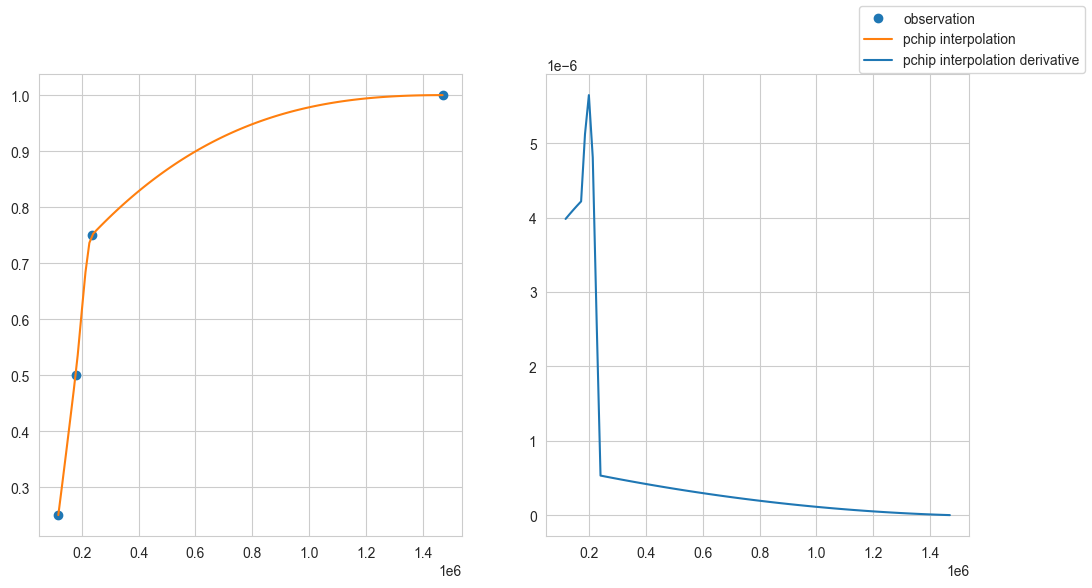

In [70]:
from scipy.interpolate import pchip_interpolate

import numpy as np

x = np.array(quantiles)
# x = np.sort(x)
print(x)
y = np.array([0.25,0.50,0.75, 1])

x_observed = x
y_observed = y
x = np.linspace(min(x_observed), max(x_observed), num=100)
y = pchip_interpolate(x_observed, y_observed, x)
y_d = pchip_interpolate(x_observed, y_observed, x, der=1)

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(x_observed, y_observed, "o", label="observation")
ax[0].plot(x, y, label="pchip interpolation")
ax[1].plot(x, y_d, label="pchip interpolation derivative")
fig.legend()
plt.show()
